In [6]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout, MaxPooling2D
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [7]:
input = Input(shape=(112, 112, 3))
conv1 = Conv2D(32, (3, 3), activation='relu')(input)
pool1 = MaxPool2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPool2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(pool2)
dense1 = Dense(128, activation='relu')(flatten)
dropout2 = Dropout(0.2)(dense1)
output = Dense(4, activation='softmax')(dropout2)
model = Model(inputs=input, outputs=output)

In [8]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 112, 112, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 110, 110, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 43264)             0   

In [10]:
N = 1600
x_train = np.zeros((N, 112, 112, 3), 'float')
y_train = np.zeros((N), 'float')

count = 0
class_labels = sorted(os.listdir("Dataset/train"))
for i, class_label in enumerate(class_labels):
    image_files = sorted(os.listdir(os.path.join("Dataset/train", class_label)))
    for image_file in image_files:
        im = cv2.imread(os.path.join("Dataset/train", class_label, image_file))
        im = cv2.resize(im, (112, 112))
        x_train[count, :, :, :] = im / 255.
        y_train[count] = i
        count += 1

y_train = to_categorical(y_train)
print('x_train', x_train.shape)
print('y_train', y_train.shape)

N2 = 200
x_valid = np.zeros((N2, 112, 112, 3), 'float')
y_valid = np.zeros((N2), 'float')

count2 = 0
class_labels = sorted(os.listdir("Dataset/val"))
for j, class_label in enumerate(class_labels):
    image_files = sorted(os.listdir(os.path.join("Dataset/val", class_label)))
    for image_file in image_files:
        im = cv2.imread(os.path.join("Dataset/val", class_label, image_file))
        im = cv2.resize(im, (112, 112))
        x_valid[count2, :, :, :] = im / 255.
        y_valid[count2] = j
        count2 += 1

y_valid = to_categorical(y_valid)
print('x_valid', x_valid.shape)
print('y_valid', y_valid.shape)

x_train (1600, 112, 112, 3)
y_train (1600, 4)
x_valid (200, 112, 112, 3)
y_valid (200, 4)


In [11]:
# Train Model
h = model.fit(x_train, y_train, validation_data=(
    x_valid, y_valid), epochs=70, batch_size=64, verbose=1)


Epoch 1/70
25/25 [==============================] - 14s 490ms/step - loss: 1.3420 - accuracy: 0.3663 - val_loss: 1.2279 - val_accuracy: 0.4550
Epoch 2/70
25/25 [==============================] - 11s 442ms/step - loss: 1.1439 - accuracy: 0.5544 - val_loss: 1.0735 - val_accuracy: 0.5750
Epoch 3/70
25/25 [==============================] - 11s 440ms/step - loss: 1.0152 - accuracy: 0.5938 - val_loss: 1.0110 - val_accuracy: 0.5700
Epoch 4/70
25/25 [==============================] - 10s 417ms/step - loss: 0.9165 - accuracy: 0.6556 - val_loss: 0.9395 - val_accuracy: 0.6300
Epoch 5/70
25/25 [==============================] - 10s 416ms/step - loss: 0.8341 - accuracy: 0.6831 - val_loss: 0.9074 - val_accuracy: 0.6400
Epoch 6/70
25/25 [==============================] - 10s 420ms/step - loss: 0.7657 - accuracy: 0.7219 - val_loss: 0.8308 - val_accuracy: 0.6850
Epoch 7/70
25/25 [==============================] - 10s 416ms/step - loss: 0.6947 - accuracy: 0.7531 - val_loss: 0.9009 - val_accuracy: 0.6150

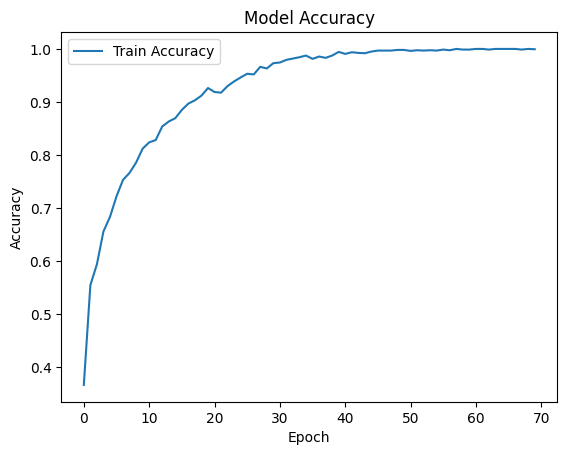

In [12]:
plt.plot(h.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy'], loc='upper left')
plt.show()

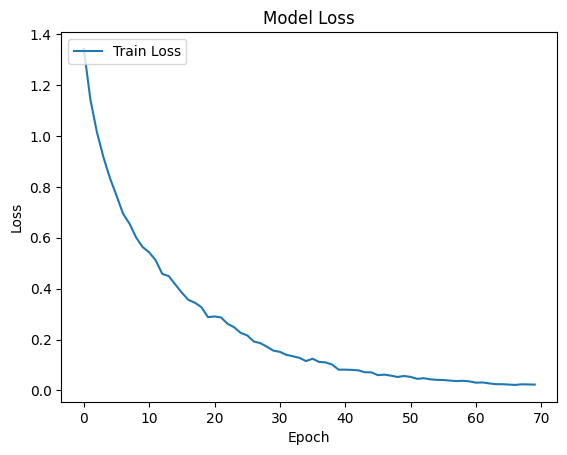

In [19]:
plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss'], loc='upper left')
plt.show()

model.save('my_model.h5')

In [14]:
N = 200
x_test = np.zeros((N, 112, 112, 3), 'float')
y_test = np.zeros((N), 'float')

count = 0
class_labels = sorted(os.listdir("Dataset/test"))
for i, class_label in enumerate(class_labels):
    image_files = sorted(os.listdir(os.path.join("Dataset/test", class_label)))
    for image_file in image_files:
        im = cv2.imread(os.path.join("Dataset/test", class_label, image_file), cv2.IMREAD_COLOR)
        im = cv2.resize(im, (112, 112))
        x_test[count] = im / 255.
        y_test[count] = i
        count += 1

y_test = to_categorical(y_test)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_test (200, 112, 112, 3)
y_test (200, 4)


In [15]:
# Make predictions on the test data
y_pred = model.predict(x_test)

# Get the class predictions and confidence scores
class_preds = y_pred.argmax(axis=1)
confidences = np.max(y_pred, axis=-1)

# Define the class names
class_names = ['B', 'D', 'R', 'S']

# Define the test data directory
test_dir = 'Dataset/test/'

test_images = []
for class_folder in os.listdir(test_dir):
    class_folder_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_folder_path):
        for image_file in os.listdir(class_folder_path):
            if image_file.endswith('.jpg'):
                image_path = os.path.join(class_folder_path, image_file)
                test_images.append(image_path)


7/7 [==============================] - 0s 38ms/step


In [16]:
# Save the predictions to a file
with open('predictions.txt', 'w') as f:
    for i in range(len(test_images)):
        image_name = os.path.basename(test_images[i])
        class_name = class_names[class_preds[i]]
        confidence = confidences[i]
        f.write("{}: ,{}\n".format(
            image_name, class_name))

In [17]:
# Evaluate model on test dataset
loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy*100)

7/7 [==============================] - 0s 38ms/step - loss: 0.8534 - accuracy: 0.7250
Test loss: 0.8533641695976257
Test accuracy: 72.50000238418579


In [18]:
# Compute the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), class_preds)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[37  2  5  6]
 [ 2 36  5  7]
 [ 1  7 41  1]
 [ 8 10  1 31]]
